In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/tenx/Credit-Risk-Probability-Modeling/

/content/drive/MyDrive/tenx/Credit-Risk-Probability-Modeling


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 -- Data Overview --
Number of rows: 95662
Number of columns: 16

 Data Types: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  obj

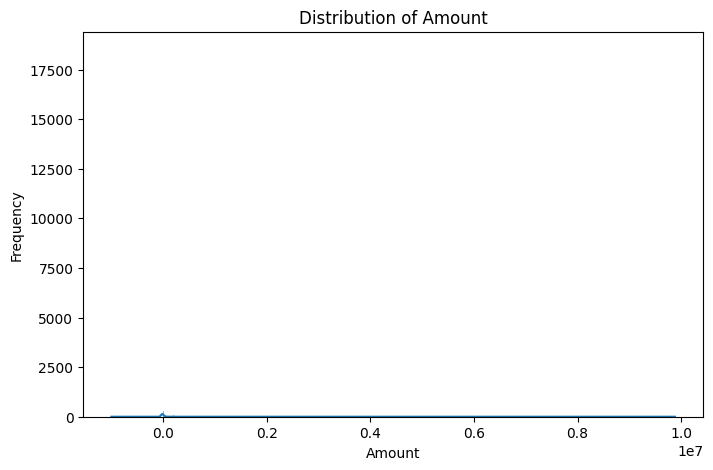

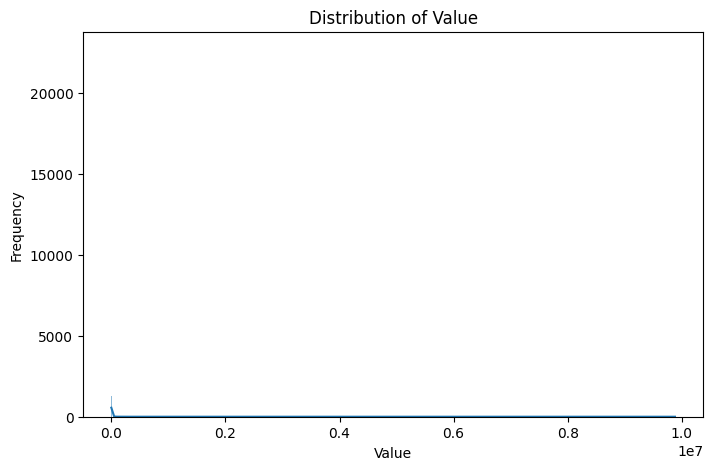

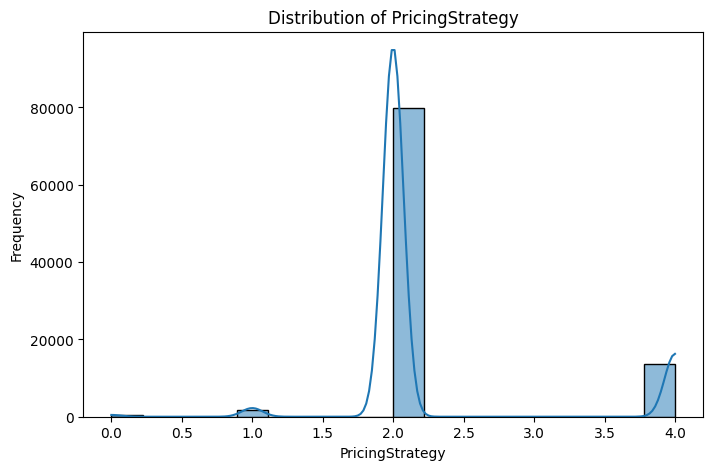

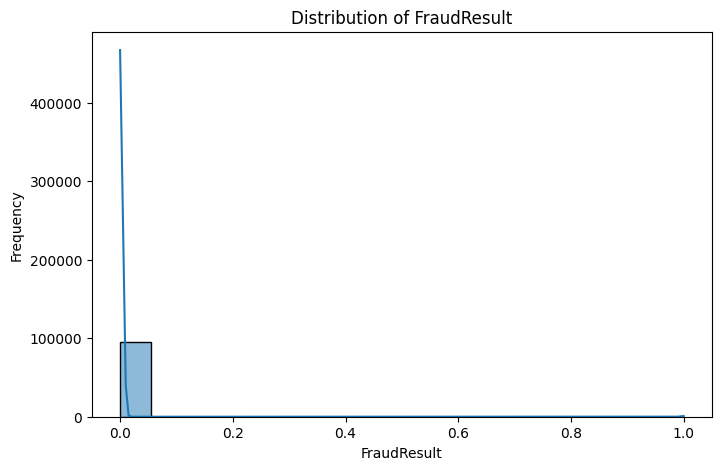


 -- Distribution of Catigorical Features --


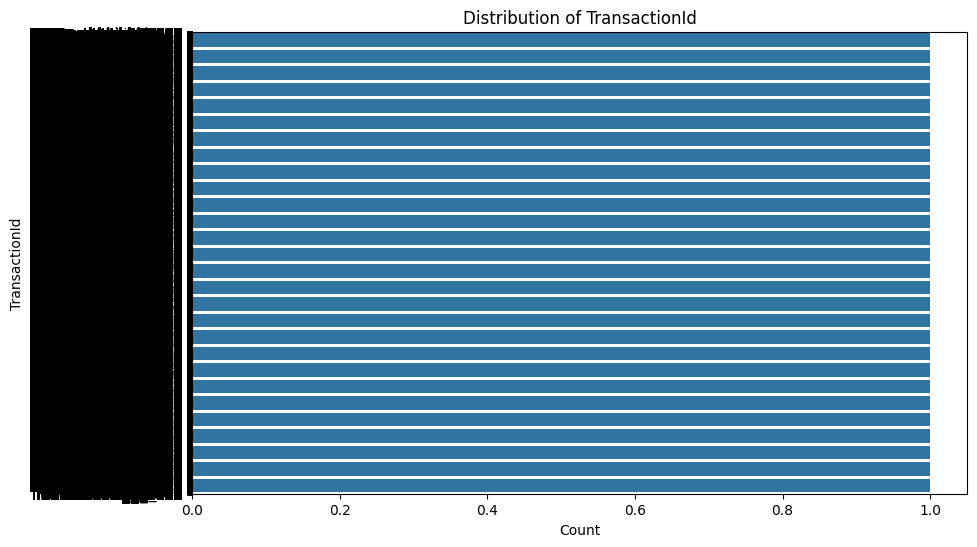

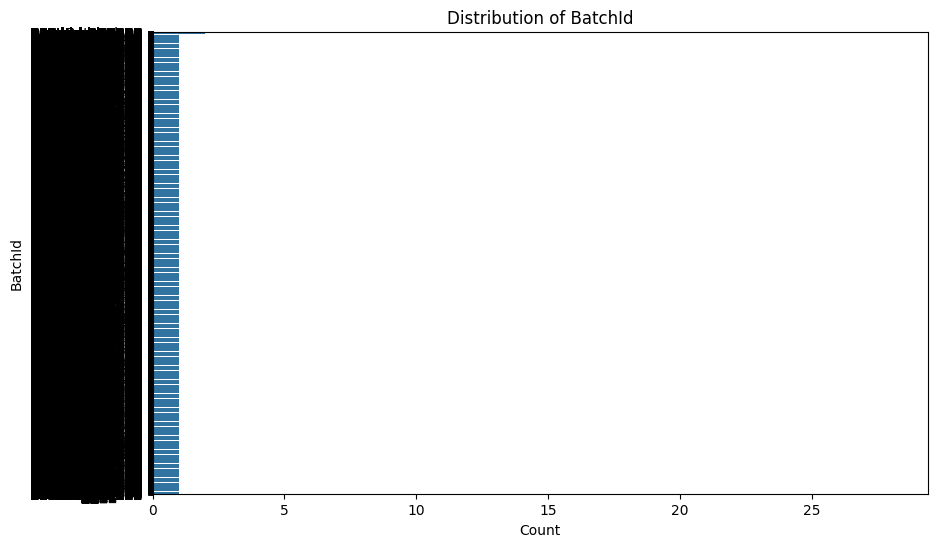

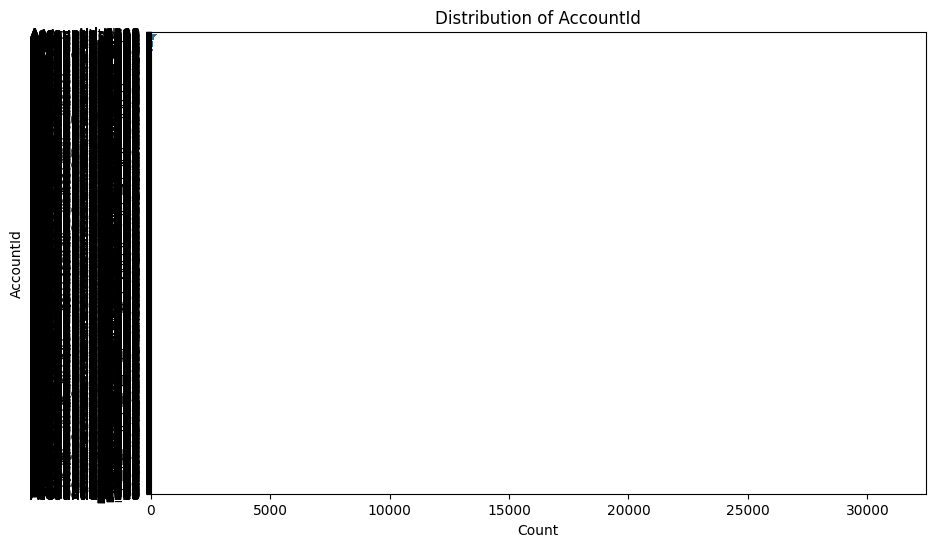

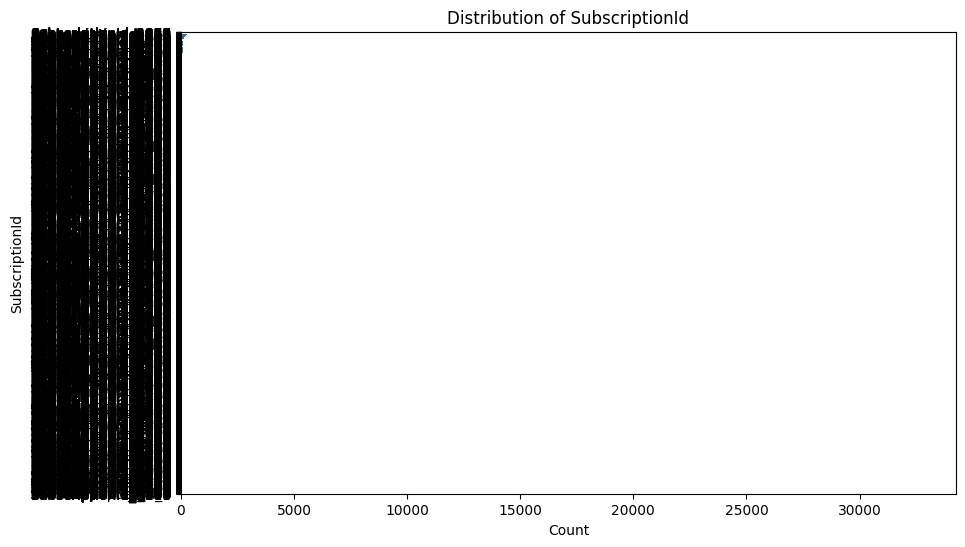

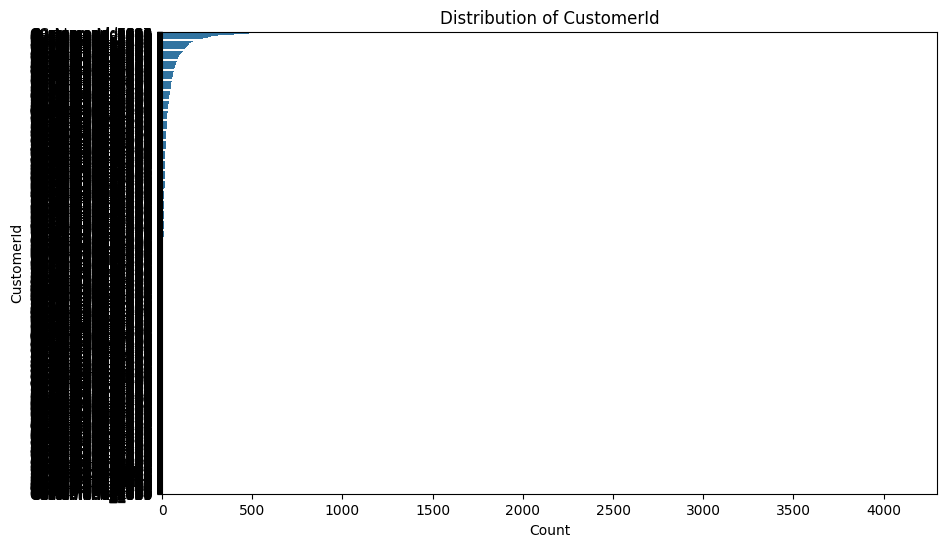

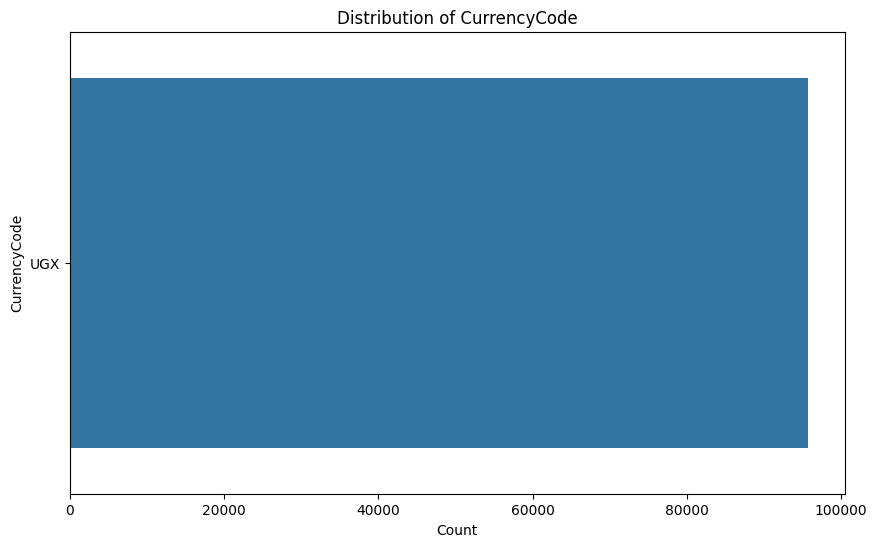

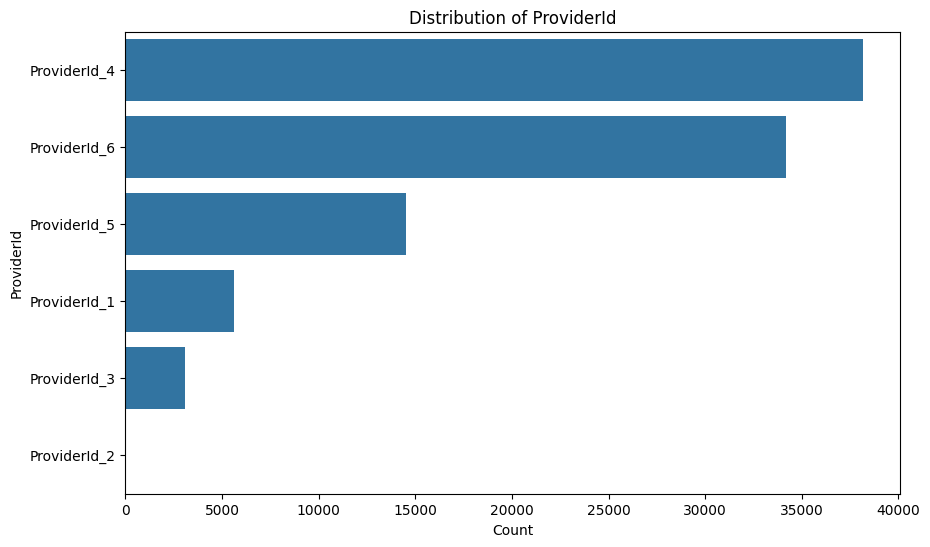

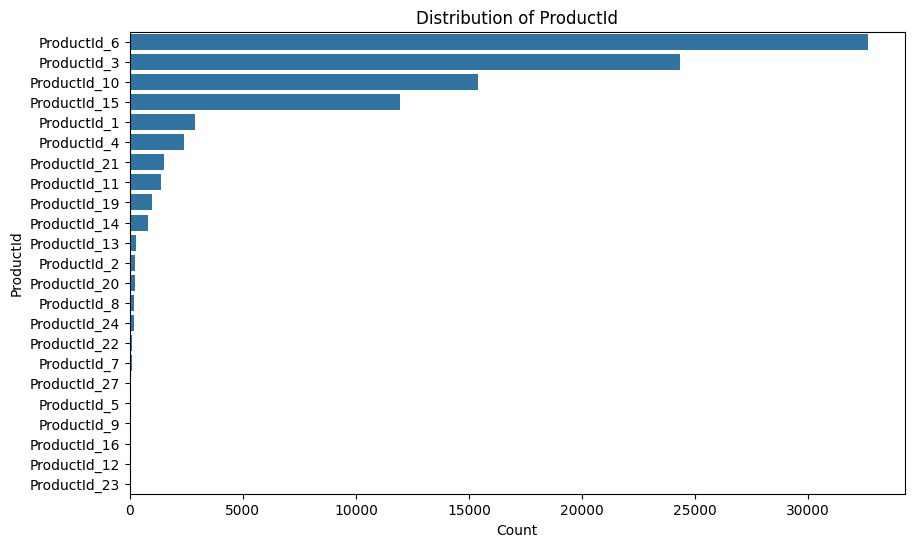

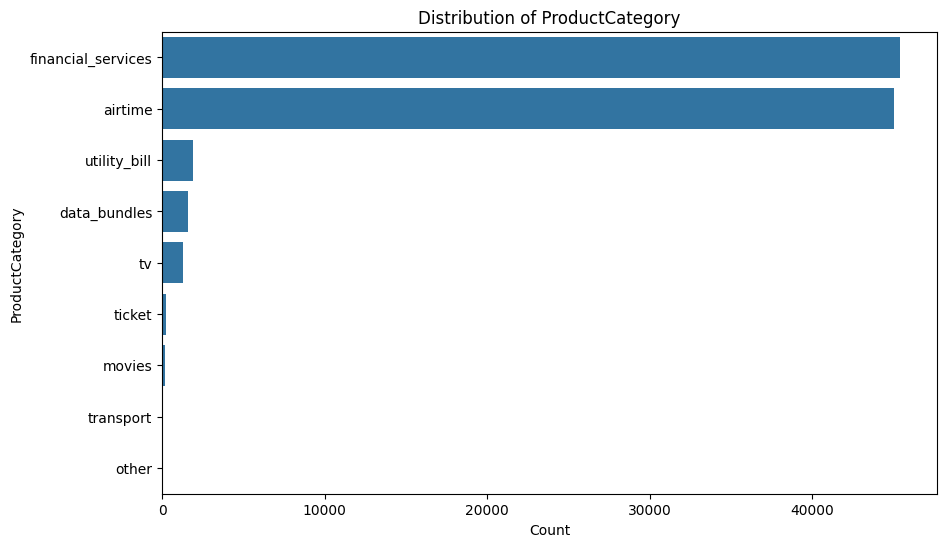

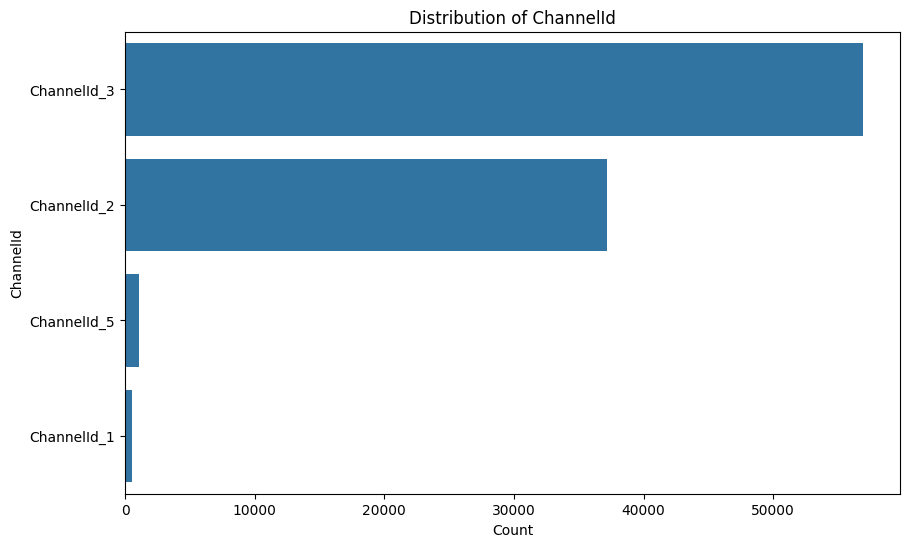

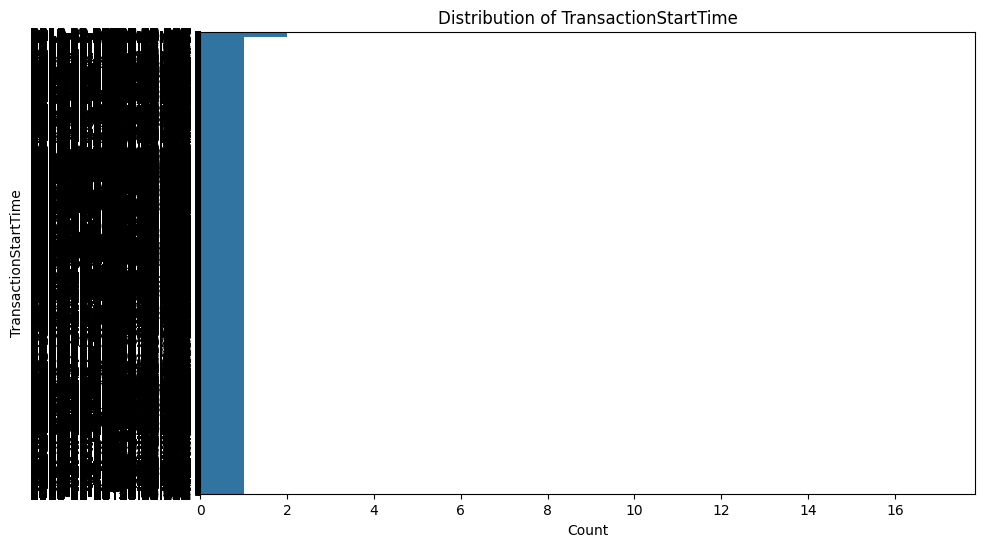


 -- Correlation Analysis --


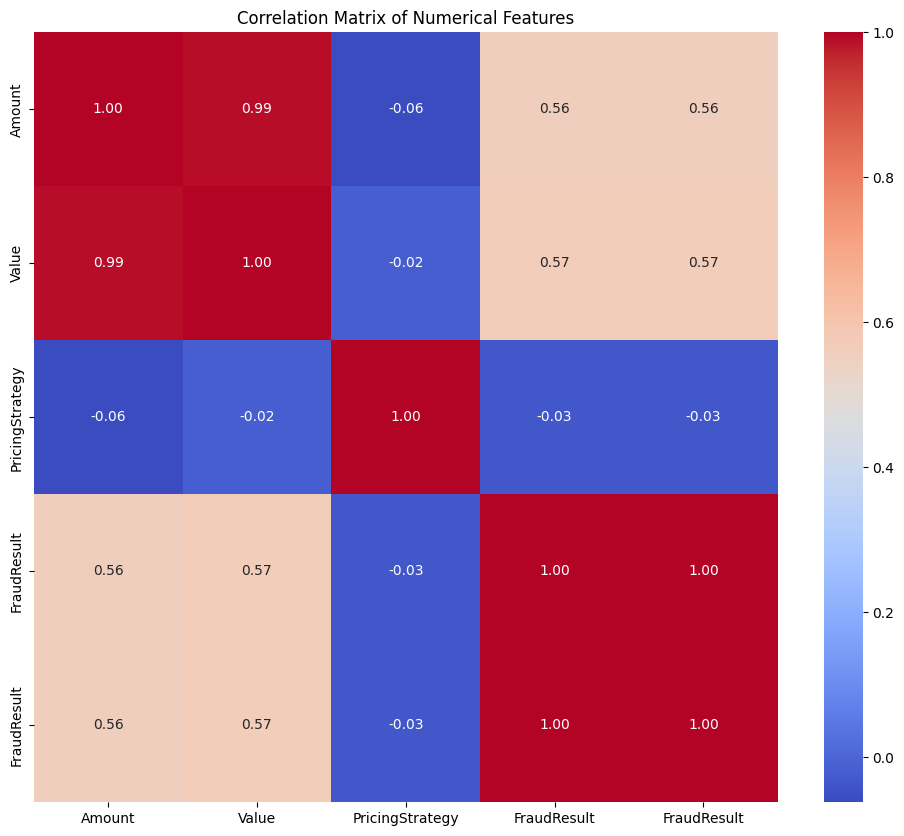


 -- Identifying Missing Value --
Empty DataFrame
Columns: [Missing_count, Missing_%]
Index: []

 -- outlier Detection (Numerical Features) --


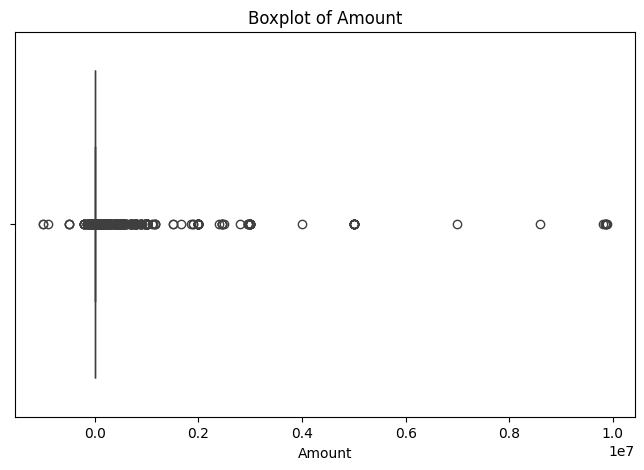

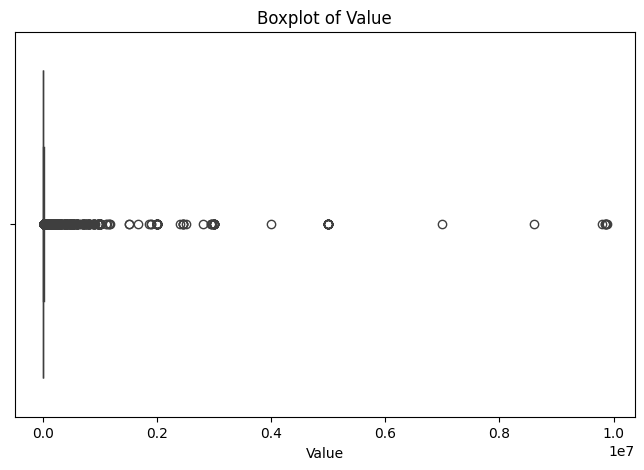

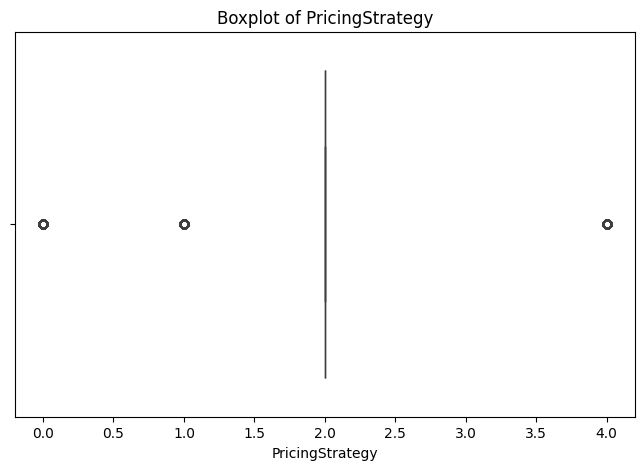

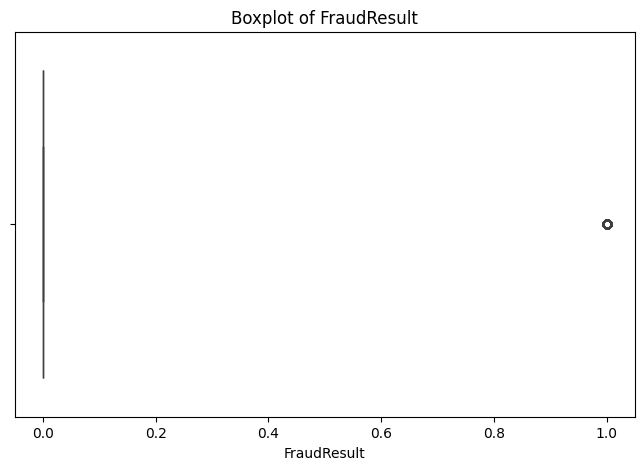

In [6]:
# Load Data
df = pd.read_csv('./data/raw/data.csv')

# --- overview of the data ---
print(" -- Data Overview --")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n Data Types: ")
print(df.info())

print("\n Summery Statics (Numerical Features) ")
print(df.describe())

print("\n Summery Statics (Categorical Features) ")
print(df.describe(include='object'))
print("\n Summery Statics (All Features) ")
print(df.describe(include='all'))

print("\n Distribution of Numerical Features ")
numerical_cols = df.select_dtypes(include = np.number).columns.tolist()

identifier_cols = ['TransactionId', 'BatchId','AccountId','SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'CountryCode']
numerical_for_dist = [col for col in numerical_cols if col not in identifier_cols]

for col in numerical_for_dist:
      plt.figure(figsize=(8,5))
      sns.histplot(df[col], kde=True)
      plt.title(f'Distribution of {col}')
      plt.xlabel(col)
      plt.ylabel('Frequency')
      plt.show()

print("\n -- Distribution of Catigorical Features --")
catigorical_cols = df.select_dtypes(include = 'object').columns.tolist()
for col in catigorical_cols:
      plt.figure(figsize= (10,6))
      sns.countplot(data=df, y=col, order=df[col].value_counts().index)
      plt.title(f'Distribution of {col}')
      plt.xlabel('Count')
      plt.ylabel(col)
      plt.show()

print("\n -- Correlation Analysis --")
corr_df = df[numerical_for_dist + ['FraudResult']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n -- Identifying Missing Value --")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100
missing_info = pd.DataFrame({
    'Missing_count': missing_values,
    'Missing_%': missing_percentage
})
print(missing_info[missing_info['Missing_count']>0].sort_values(by= 'Missing_%', ascending=False))

print("\n -- outlier Detection (Numerical Features) --")
for col in numerical_for_dist:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()
